In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
#Step 1: Generate synthetic temperature data
# Simulate average monthly temperature (°C)

np.random.seed(42)
months = np.arange(1, 13).reshape(-1, 1)
# 1 to 12 (Jan to Dec)

In [4]:
# True trend: sinusoidal-like seasonal pattern + random noise
temperature = 25 + 10 * np.sin((months - 2) * np.pi / 6) + np.random.normal(0, 1.5, size=months.shape)

In [5]:
#Step 2: Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(months, temperature)
temp_lin_pred = lin_reg.predict(months)

In [6]:
#Step 3: Polynomial Regression


poly = PolynomialFeatures(degree=4)
months_poly = poly.fit_transform(months)

poly_reg = LinearRegression()
poly_reg.fit(months_poly, temperature)
temp_poly_pred = poly_reg.predict(months_poly)

In [7]:
#Step 4: Evaluate


r2_lin = r2_score(temperature, temp_lin_pred)
r2_poly = r2_score(temperature, temp_poly_pred)

print("Linear Regression R²:", round(r2_lin, 4))
print("Polynomial Regression R²:", round(r2_poly, 4))

Linear Regression R²: 0.3251
Polynomial Regression R²: 0.9832


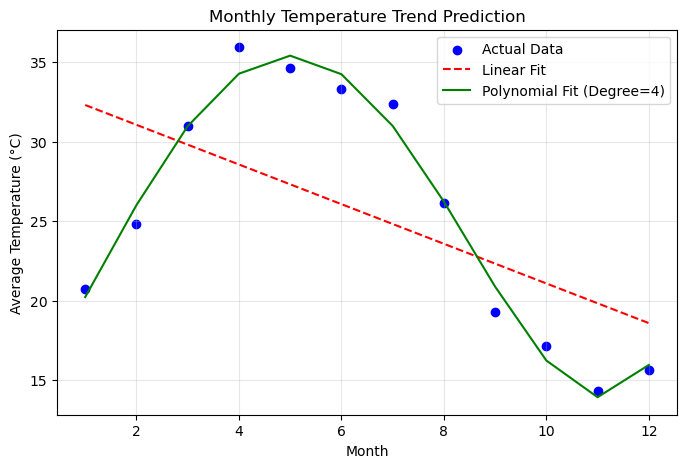

In [9]:
#Step 5: Plot

plt.figure(figsize=(8,5))
plt.scatter(months, temperature, color='blue', label='Actual Data')
plt.plot(months, temp_lin_pred, color='red', linestyle='--', label='Linear Fit')
plt.plot(months, temp_poly_pred, color='green', label='Polynomial Fit (Degree=4)')
plt.title("Monthly Temperature Trend Prediction")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()